# Le jeu Palworld et analyse des données

## Présentation du jeu Palworld

Palworld est un jeu de survie en monde ouvert développé par Pocket Pair, sorti en janvier 2024. Ce jeu combine des éléments de survie, de crafting, de collection de créatures et de construction de base. Il se déroule dans un monde ouvert peuplé de créatures appelées "Pals" que les joueurs peuvent capturer, élever et utiliser pour diverses tâches.

Les aspects clés du jeu incluent:

| Aspect |
| - |
| La capture et la collection de Pals (similaire à Pokémon) |
| L'utilisation des Pals pour combattre |
| L'exploitation des Pals pour des tâches comme la construction, l'agriculture, et le travail en usine |
| La construction et le développement d'un campement |
| L'exploration d'un monde ouvert avec différentes zones et biomes |

Le jeu a connu un immense succès dès sa sortie en raison de son concept innovant mêlant des mécaniques de jeux populaires comme Pokémon et Minecraft, mais avec une approche plus mature et parfois controversée.


## Analyse des Fichiers CSV et leur Rôle dans le Jeu

### Vue d'ensemble des Données Palworld

Sur la base des descriptions fournies, voici une analyse de chaque fichier de données et son importance dans le jeu :

### 1.  Palworld_Data--Palu combat attribute table.csv

**Contenu :**
- Statistiques de base (santé, attaque, défense, vitesse)
- Types élémentaires (Feu, Eau, Électricité, etc.)
- Compétences de combat spécifiques

**Rôle dans le jeu :** Ces données déterminent l'efficacité d'un Pal au combat. Les joueurs utilisent ces informations pour construire des équipes équilibrées et stratégiques pour les combats contre d'autres Pals ou les boss.

### 2.  Palworld_Data--Palu refresh level.csv

**Contenu :** Informations sur les niveaux auxquels les Pals apparaissent dans différentes zones du jeu.

**Rôle dans le jeu :** Cette information est cruciale pour les joueurs qui cherchent à capturer des Pals spécifiques. Elle permet de savoir où trouver certains Pals et à quel niveau ils apparaîtront, ce qui affecte leur difficulté de capture et leurs statistiques initiales.

### 3. Palworld_Data-Palu Job Skills Table.csv

**Contenu :** Compétences de travail que possèdent les différents Pals :
- Minage
- Bûcheronnage
- Agriculture
- Construction
- Cuisine
- Etc.

**Rôle dans le jeu :** Ces compétences déterminent quelles tâches un Pal peut effectuer dans votre campement. Un Pal avec une compétence de minage élevée sera efficace pour extraire des minerais, tandis qu'un Pal avec des compétences agricoles sera utile pour cultiver des ressources alimentaires.

### 4.  Palworld_Data-Tower BOSS attribute comparison.csv

**Contenu :** Attributs des boss spéciaux qui apparaissent dans les tours du jeu.

**Rôle dans le jeu :** Les tours sont des défis endgame où les joueurs affrontent des boss puissants. Ces données aident à comprendre la puissance relative de ces boss et à préparer des stratégies adaptées pour les combattre.

### 5.  Palworld_Data-comparison of ordinary BOSS attributes.csv

**Contenu :** Attributs des boss ordinaires que l'on trouve dans le monde ouvert.

**Rôle dans le jeu :** Ces boss représentent des défis importants durant l'exploration et fournissent des récompenses précieuses. Comprendre leurs attributs permet aux joueurs de se préparer adéquatement à ces affrontements.

### 6.  Palworld_Data-hide pallu attributes.csv

**Contenu :** Informations sur des attributs cachés des Pals qui ne sont pas immédiatement visibles dans le jeu.

**Rôle dans le jeu :** Ces attributs cachés peuvent inclure des taux de croissance spécifiques, des affinités particulières, ou des capacités spéciales qui se débloquent dans certaines conditions. Ces informations sont précieuses pour les joueurs qui cherchent à optimiser leurs Pals.

---
## Implications pour l'Analyse

Cette structure de données nous permettra d'analyser :
- **Optimisation des équipes de combat** via les attributs de combat
- **Gestion efficace des ressources** via les compétences de travail
- **Stratégies de capture** via les zones d'apparition et probabilités
- **Progression du jeu** via les niveaux et raretés des Pals

## Identification des leviers de performance via l’exploration des données de Palworld

## Import des bibliothèques Python de l'étude

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mariadb
from sqlalchemy import create_engine
import plotly.express as px
import plotly.graph_objects as go
import os
import csv
from pathlib import Path

##  A Distribution de la taille des Pals

 ### Objectif :
Analyser comment les tailles des Pals sont réparties : min, max, moyenne, écart-type, histogramme, etc.

Statistiques descriptives sur la taille des Pals :
count     138
unique      5
top         L
freq       43
Name: volume_size, dtype: object


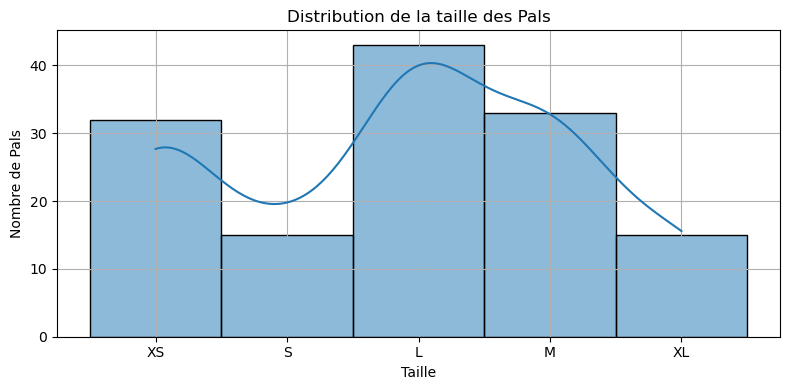

In [10]:
# === Configuration de connexion à MariaDB ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Connexion via SQLAlchemy (driver mariadbconnector) ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL : récupérer les tailles de Pals ===
query = """
SELECT name, volume_size
FROM palu_combat_attribute
WHERE volume_size IS NOT NULL;
"""

# === Lecture des données via pandas ===
df_size = pd.read_sql(query, engine)

# === Nettoyage et conversion ===
#df_size['size'] = pd.to_numeric(df_size['size'], errors='coerce')
#df_size.dropna(subset=['size'], inplace=True)

# === Statistiques descriptives ===
print("Statistiques descriptives sur la taille des Pals :")
print(df_size['volume_size'].describe())

# === Visualisation ===
plt.figure(figsize=(8, 4))
sns.histplot(df_size['volume_size'], bins=20, kde=True)
plt.title("Distribution de la taille des Pals")
plt.xlabel("Taille")
plt.ylabel("Nombre de Pals")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Déconnexion propre ===
engine.dispose()


## Analyse:
L’analyse de la variable volume_size, représentant la taille des Pals, met en évidence une répartition asymétrique centrée autour des tailles moyennes à grandes. L’histogramme ci-dessus illustre cette répartition en cinq classes distinctes : XS, S, M, L, et XL.

La majorité des Pals se situent dans les catégories M (moyens) et surtout L (grands), qui représente la classe la plus fréquente. À l’inverse, les tailles extrêmes – XS (extra-petits) et XL (extra-grands) – sont moins représentées dans l’échantillon.

 ## B Distribution  des Pals selon la catégorie

 ### Objectif :
Visualiser la répartition de tous les types élémentaires utilisés par les Pals, qu’ils soient en élément principal (element_1) ou secondaire (element_2).

Répartition des éléments des Pals :
dark           26
Wood           23
fire           22
generally      21
ice            18
land           15
water          14
dragon         14
electricity    11
Name: count, dtype: int64


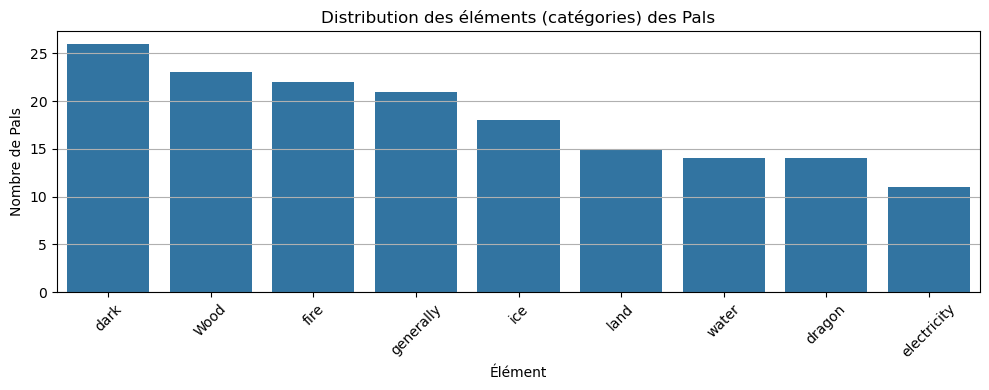

In [14]:
# === Configuration de la base ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à la base ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL :
query = """
SELECT element_1, element_2
FROM palu_combat_attribute
WHERE (element_1 IS NOT NULL AND element_1 != '')
   OR (element_2 IS NOT NULL AND element_2 != '');
"""

df_elements = pd.read_sql(query, engine)

# === Fusion des deux colonnes pour analyser toutes les occurrences ===
all_elements = pd.concat([df_elements['element_1'], df_elements['element_2']])
all_elements = all_elements.dropna().str.strip()

# === Comptage des fréquences ===
element_counts = all_elements.value_counts()

# === Affichage texte ===
print("Répartition des éléments des Pals :")
print(element_counts)

# === Visualisation ===
plt.figure(figsize=(10, 4))
sns.barplot(x=element_counts.index, y=element_counts.values)
plt.title("Distribution des éléments (catégories) des Pals")
plt.xlabel("Élément")
plt.ylabel("Nombre de Pals")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# === Déconnexion ===
engine.dispose()


### analyse:
Cette visualisation met en évidence la répartition des éléments principaux (ou types) associés aux Pals du jeu. Ces éléments déterminent généralement les forces, faiblesses et affinités de chaque Pal dans les combats ou les tâches spécifiques.

Parmi les neuf éléments recensés, on observe que :

L’élément dark (obscurité) est le plus représenté, avec plus de 25 Pals. Cela peut refléter une orientation stratégique vers des capacités puissantes mais potentiellement coûteuses ou rares.

Les éléments wood (bois), fire (feu) et generally (neutre ou non spécifié) sont également bien représentés, suggérant leur polyvalence et leur utilité dans diverses situations de jeu.

Les éléments comme ice, land et water sont présents de façon modérée, avec entre 15 et 20 représentants chacun.

Enfin, les éléments dragon et electricity sont les moins fréquents, ce qui suggère une rareté potentielle de ces types ou une spécialisation plus poussée.


 ### C  Distribution des points de vie (HP) des Pals

### Objectif :
Analyser comment les points de vie (HP) des Pals sont répartis :

-Moyenne, médiane, min, max

-Visualisation par histogramme



Statistiques des HP des Pals :
count    138.000000
mean      93.442029
std       20.855785
min       60.000000
25%       75.000000
50%       90.000000
75%      108.750000
max      150.000000
Name: HP, dtype: float64


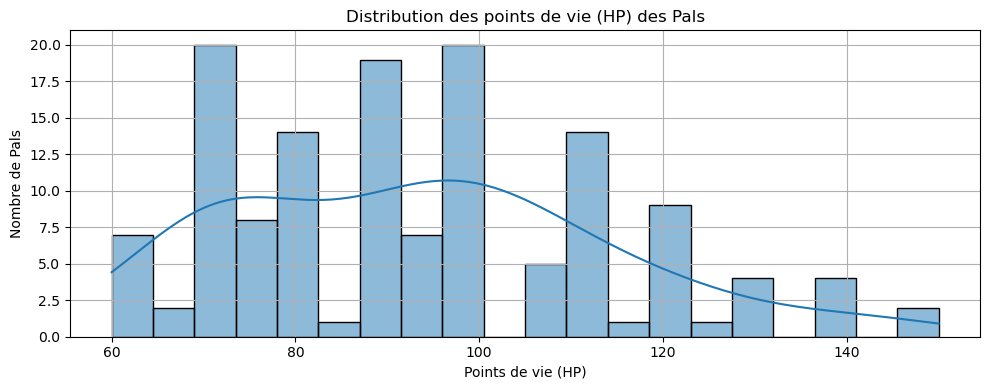

In [18]:
# === Configuration connexion ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}


# === Connexion via SQLAlchemy ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL pour récupérer les HP ===
query = """
SELECT name, HP
FROM palu_combat_attribute
WHERE HP IS NOT NULL;
"""

df_hp = pd.read_sql(query, engine)

# === Nettoyage (si nécessaire) ===
df_hp['HP'] = pd.to_numeric(df_hp['HP'], errors='coerce')
df_hp.dropna(subset=['HP'], inplace=True)

# === Statistiques descriptives ===
print("Statistiques des HP des Pals :")
print(df_hp['HP'].describe())

# === Visualisation ===
plt.figure(figsize=(10, 4))
sns.histplot(df_hp['HP'], bins=20, kde=True)
plt.title("Distribution des points de vie (HP) des Pals")
plt.xlabel("Points de vie (HP)")
plt.ylabel("Nombre de Pals")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Déconnexion propre ===
engine.dispose()


### analyse:
L’histogramme ci-dessus montre la répartition des points de vie (HP) des Pals, un indicateur fondamental de leur capacité de survie en combat. La majorité des Pals se situent dans une plage de HP comprise entre 70 et 110, avec un pic autour de 90 HP, ce qui correspond également à la médiane de l’échantillon.

La distribution est asymétrique légèrement étendue à droite, indiquant que bien que la majorité des Pals aient une endurance modérée, il existe une minorité de Pals très robustes avec des HP supérieurs à 120.

La concentration autour de 80 à 100 HP suggère que les développeurs ont cherché à standardiser la résistance de base pour la majorité des Pals.

Les Pals dotés de plus de 120 HP peuvent être considérés comme les plus résistants dans une équipe de combat, capables d'encaisser de nombreux dégâts.



### D  Distribution de la rareté des Pals


### Objectif :
Étudier la répartition de la rareté (rarity) des Pals dans le jeu. Cela permet d’observer :

Combien de Pals sont très rares, communs ou intermédiaires.

La structure de difficulté ou d’équilibre du jeu.

Statistiques sur la rareté des Pals :
count    138.000000
mean       5.384058
std        4.006058
min        1.000000
25%        2.000000
50%        5.000000
75%        7.750000
max       20.000000
Name: rarity, dtype: float64

Nombre de Pals par niveau de rareté :
rarity
1     28
2     12
3     10
4     10
5     11
6     17
7     15
8     15
9     11
10     4
20     5
Name: count, dtype: int64


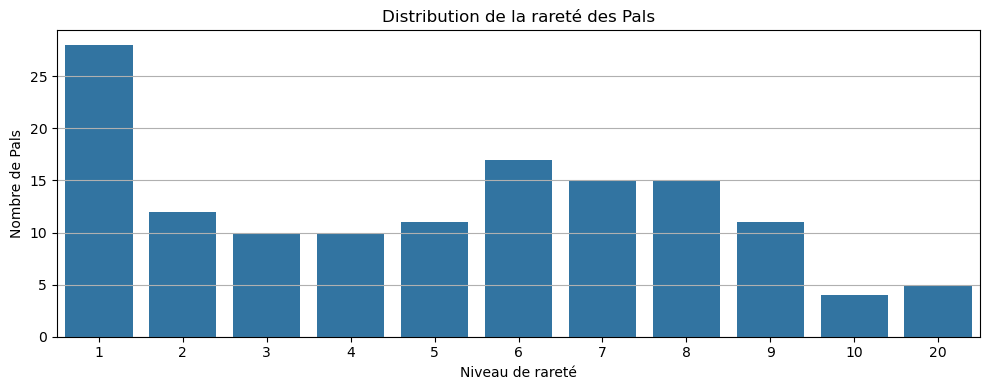

In [22]:
# === Configuration de la base de données ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion SQLAlchemy ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL pour récupérer la rareté ===
query = """
SELECT name, rarity
FROM palu_combat_attribute
WHERE rarity IS NOT NULL;
"""

df_rarity = pd.read_sql(query, engine)


# === Statistiques descriptives ===
print("Statistiques sur la rareté des Pals :")
print(df_rarity['rarity'].describe())

# === Distribution (nombre de Pals par niveau de rareté) ===
rarity_counts = df_rarity['rarity'].value_counts().sort_index()

# === Affichage console ===
print("\nNombre de Pals par niveau de rareté :")
print(rarity_counts)

# === Visualisation ===
plt.figure(figsize=(10, 4))
sns.barplot(x=rarity_counts.index.astype(str), y=rarity_counts.values)
plt.title("Distribution de la rareté des Pals")
plt.xlabel("Niveau de rareté")
plt.ylabel("Nombre de Pals")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# === Déconnexion ===
engine.dispose()


### analyse:
Cette visualisation montre comment les Pals sont répartis selon leur niveau de rareté, un indicateur central qui reflète à la fois leur disponibilité et souvent leur puissance ou utilité stratégique dans le jeu.  

Le niveau de rareté 1 est le plus fréquent, avec 28 Pals, ce qui représente la base commune du bestiaire.

La majorité des Pals ont une rareté comprise entre 3 et 9, avec une concentration autour de 6 à 8, ce qui correspond à une rareté modérée à élevée.

On note un petit groupe de Pals exceptionnels aux raretés 10 et 20, qui ne comptent que quelques représentants. Ces derniers sont probablement des Pals très puissants ou difficiles à obtenir.

## E  Distribution de la consommation alimentaire des Pals


### Objectif :
Analyser la répartition de la quantité de nourriture consommée par chaque Pal. Cela permet d’identifier :

Quels Pals consomment beaucoup (ressources critiques),

Les plus économes, utiles en survie/gestion de base.



Statistiques de consommation alimentaire par taille (volume_size) :


,count,mean,std,min,25%,50%,75%,max
volume_size,,,,,,,,
Small,15.0,3.266667,1.032796,2.0,3.0,3.0,3.0,6.0
big,43.0,6.302326,1.354620,3.0,5.0,6.0,7.0,9.0
maximum,15.0,7.666667,0.816497,7.0,7.0,7.0,8.0,9.0
medium,33.0,4.060606,1.170988,2.0,3.0,4.0,5.0,7.0
smallest,32.0,1.843750,0.627816,1.0,1.0,2.0,2.0,3.0


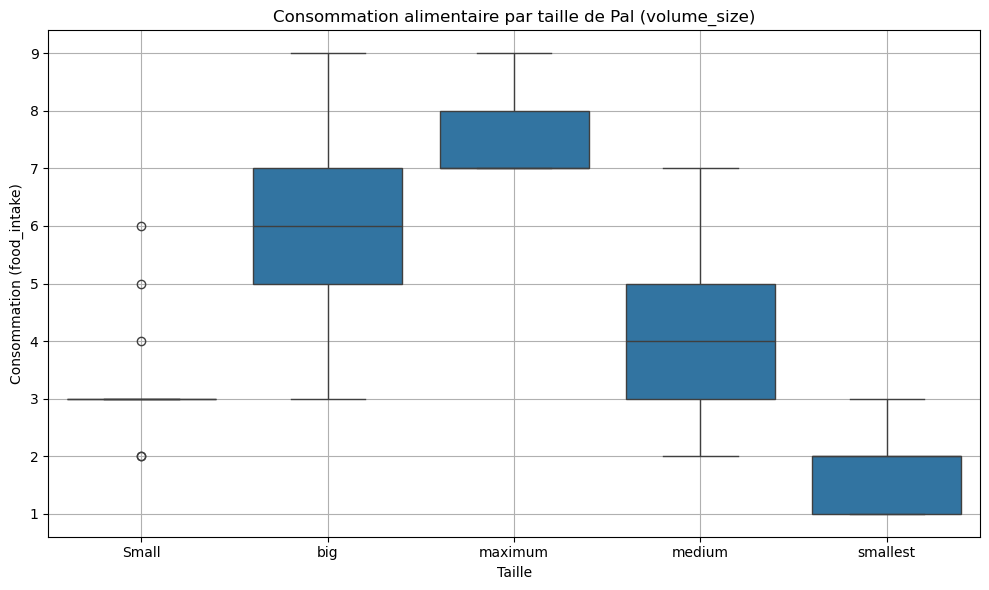

In [26]:
# === Requête SQL directe ===
query = """
SELECT volume_size, food_intake
FROM job_skills
WHERE food_intake IS NOT NULL AND volume_size IS NOT NULL;
"""

df_volume = pd.read_sql(query, engine)

# Nettoyage
df_volume['food_intake'] = pd.to_numeric(df_volume['food_intake'], errors='coerce')
df_volume.dropna(subset=['food_intake', 'volume_size'], inplace=True)

# Statistiques descriptives
grouped_volume = df_volume.groupby('volume_size')['food_intake'].describe()
print("Statistiques de consommation alimentaire par taille (volume_size) :")
display(grouped_volume)

# Visualisation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_volume, x='volume_size', y='food_intake', order=sorted(df_volume['volume_size'].unique()))
plt.title("Consommation alimentaire par taille de Pal (volume_size)")
plt.xlabel("Taille")
plt.ylabel("Consommation (food_intake)")
plt.grid(True)
plt.tight_layout()
plt.show()

### analyse:
Ce graphique boxplot illustre la relation entre la taille des Pals (volume_size) et leur niveau de consommation alimentaire (food_intake). Il met en évidence une corrélation claire entre la taille et la quantité de nourriture consommée.

Les Pals "smallest" (très petits) consomment en moyenne moins de 2 unités, avec une variation faible ce sont les Pals les plus économes.

Les Pals "small" consomment légèrement plus (autour de 3 unités), mais restent dans une fourchette basse.

Les tailles "medium" et "big" marquent une progression nette, avec des consommations moyennes respectivement autour de 4 et 6 unités, et une variabilité plus importante.  
Les Pals "maximum", les plus grands, affichent la consommation la plus élevée, avec une médiane proche de 8 unités et un maximum atteignant 9.

 Interprétation stratégique :
 
Cette tendance montre une progression linéaire entre la taille et la consommation alimentaire, ce qui est logique biologiquement et intéressant tactiquement.

Les Pals de petite taille peuvent être rentables à élever en grand nombre, utiles pour les tâches légères ou répétitives.

À l'inverse, les Pals de grande taille sont probablement plus puissants ou plus productifs, mais nécessitent une gestion plus rigoureuse des ressources alimentaires.

Statistiques sur la consommation alimentaire (food_intake) :
count    138.000000
mean       4.550725
std        2.263878
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max        9.000000
Name: food_intake, dtype: float64


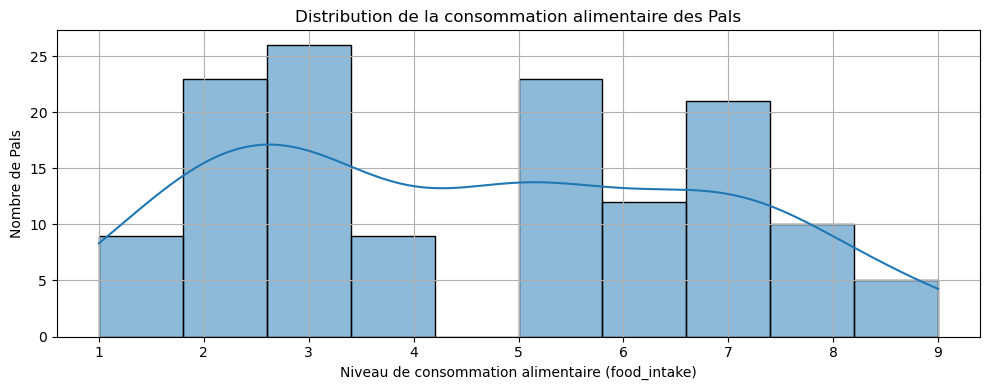

In [28]:
# === Configuration de la base de données ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Connexion SQLAlchemy ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL : consommation alimentaire depuis job_skills ===
query = """
SELECT english_name AS name, food_intake
FROM job_skills
WHERE food_intake IS NOT NULL;
"""

df_food = pd.read_sql(query, engine)

# === Nettoyage ===
df_food['food_intake'] = pd.to_numeric(df_food['food_intake'], errors='coerce')
df_food.dropna(subset=['food_intake'], inplace=True)

# === Statistiques descriptives ===
print("Statistiques sur la consommation alimentaire (food_intake) :")
print(df_food['food_intake'].describe())

# === Visualisation ===
plt.figure(figsize=(10, 4))
sns.histplot(df_food['food_intake'], bins=10, kde=True)
plt.title("Distribution de la consommation alimentaire des Pals")
plt.xlabel("Niveau de consommation alimentaire (food_intake)")
plt.ylabel("Nombre de Pals")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Déconnexion propre ===
engine.dispose()


### Analyse:
Cette figure montre la distribution de la variable food_intake, représentant la quantité de nourriture consommée par chaque Pal. Cette donnée est essentielle pour anticiper les besoins logistiques du campement ou équilibrer une équipe.

Interprétation du graphique :

La majorité des Pals consomment entre 3 et 7 unités de nourriture.

On observe un pic autour de 3, suivi d’une répartition assez équilibrée jusqu’à 7.

Les Pals ayant des besoins très faibles (1 à 2) sont peu fréquents mais représentent une option économique en termes de ressources.

À l’inverse, les Pals très gourmands (8–9) sont minoritaires, probablement car ils offrent une puissance ou une utilité particulière (ranch, combat, défense...).

Interprétation stratégique :
Cette distribution révèle un équilibrage volontaire : la plupart des Pals sont modérément coûteux à entretenir.

Les extrêmes (1 et 9) forment des cas spécifiques : soit pour optimiser les ressources, soit pour cibler des fonctions avancées.

L’analyse croisée avec la taille (volume_size) confirme que la consommation est fortement corrélée à la taille du Pal (cf. analyse précédente).

## F  Produits utiles au campement via le ranch 

## objectif:
Identifier les Pals capables de produire de la laine, du lait, des œufs, etc. grâce à leurs compétences de ranch.

Quelle taille de Pal est la plus polyvalente ?



Pals qui produisent des objets utiles au ranch :


,english_name,ranch_items
0,chikipi,Egg
1,vixy,Palu Ball Advanced Palu Ball Arrow Gold Coin
2,cremis,wool
3,mau,gold
4,maucryst,gold
5,mozzarina,milk
6,woolipop,Marshmallow
7,caprity,red wild berries
8,melpaca,wool
9,sibelyx,high quality cloth


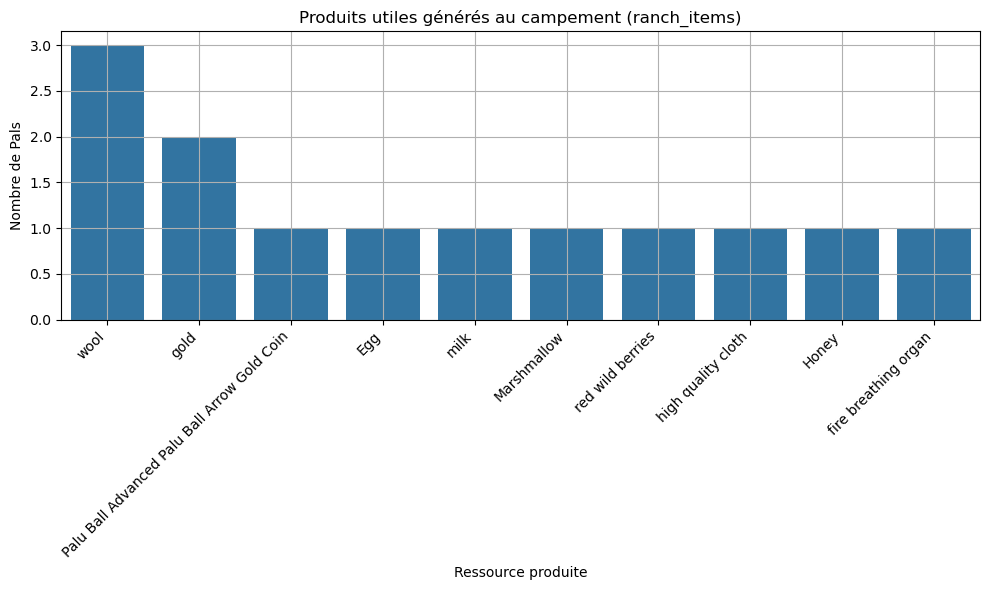

In [32]:
# === Récupération des données depuis la table job_skills ===
query = """
SELECT english_name, ranch_items
FROM job_skills
WHERE ranch_items IS NOT NULL AND ranch_items != '';
"""

df_ranch = pd.read_sql(query, engine)

# Nettoyage de base (facultatif)
df_ranch['ranch_items'] = df_ranch['ranch_items'].str.strip()

# Affichage des Pals et ressources
print("Pals qui produisent des objets utiles au ranch :")
display(df_ranch)

# Statistiques : fréquence des ressources
resource_counts = df_ranch['ranch_items'].value_counts().reset_index()
resource_counts.columns = ['Ressource produite', 'Nombre de Pals']

# Affichage
plt.figure(figsize=(10, 6))
sns.barplot(data=resource_counts, x='Ressource produite', y='Nombre de Pals')
plt.title("Produits utiles générés au campement (ranch_items)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Nombre de Pals")
plt.grid(True)
plt.tight_layout()
plt.show()


### Analyse:
Ce graphique présente les ressources que les Pals peuvent produire lorsqu’ils sont affectés à un ranch, via la variable ranch_items. Ces produits jouent un rôle crucial dans la gestion du campement, le craft, ou encore l’économie du jeu.
Lecture du graphique :
Le produit le plus courant est la laine (wool), générée par 3 Pals, confirmant son rôle de ressource de base.

Suivent l’or (gold), les œufs (egg) et le lait (milk), chacun produit par 1 à 2 Pals, avec une utilité probable dans les recettes, le commerce, ou la reproduction.

D’autres produits plus spécifiques apparaissent comme :

high quality cloth (tissu de qualité)

honey (miel)

fire breathing organ (organe cracheur de feu)

red wild berries ou marshmallow (nourriture/ressources avancées)

Interprétation stratégique :  
Cette répartition met en lumière une diversité utile mais concentrée : la majorité des produits sont générés par un très petit nombre de Pals, ce qui renforce leur valeur stratégique.

Certains produits rares peuvent être cruciaux dans les étapes avancées du jeu (tissu de qualité, or, organes).

Les produits comme la laine ou le lait peuvent servir de commencement pour maintenir l’économie du campement.



## G la distribution de la puissance de combat parmi les Pals

### Objectif :
Cette analyse va permettre d'identifier les 10 Pals les plus puissants en se basant sur leurs attributs de combat.

Pour cela nous devons calculer une puissance globale pour chaque Pal basée sur :

melee_attack

remote_attack

defense

support

Visualiser la distribution générale de cette puissance

Extraire le Top 10 des Pals les plus puissant

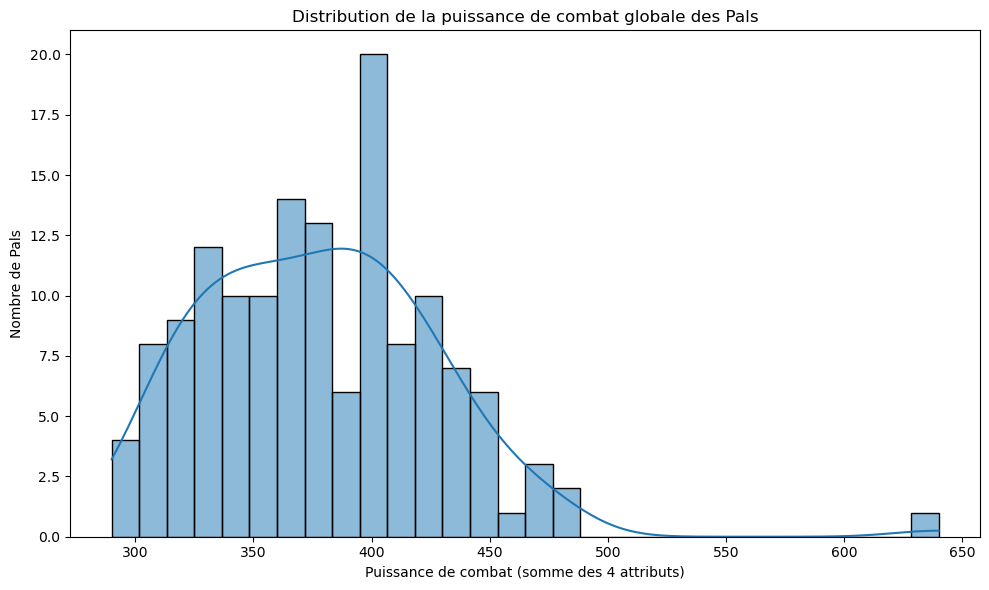

🔥 Top 10 des Pals les plus puissants :


,OverrideNameTextID,melee_attack,remote_attack,defense,support,combat_power
135,snowboss,130,200,220,90,640
45,blackgriffon,130,120,140,90,480
91,umihebifire,150,130,100,100,480
116,saintcentaur,110,120,145,100,475
126,umihebi,150,120,100,100,470
123,blackcentaur,100,145,120,100,465
115,anubis,130,130,100,100,460
30,whitetiger,140,100,110,100,450
118,jetdragon,100,140,110,100,450
129,volcanoboss,100,140,110,100,450


In [51]:
# 1. Requête pour extraire les attributs de combat
query = """
SELECT OverrideNameTextID, melee_attack, remote_attack, defense, support
FROM monsters
WHERE melee_attack IS NOT NULL AND remote_attack IS NOT NULL AND defense IS NOT NULL AND support IS NOT NULL;
"""
df_combat = pd.read_sql(query, engine)

# 2. Calcul de la puissance globale
df_combat['combat_power'] = df_combat['melee_attack'] + df_combat['remote_attack'] + df_combat['defense'] + df_combat['support']

# 3. Distribution visuelle
plt.figure(figsize=(10, 6))
sns.histplot(df_combat['combat_power'], bins=30, kde=True)
plt.title("Distribution de la puissance de combat globale des Pals")
plt.xlabel("Puissance de combat (somme des 4 attributs)")
plt.ylabel("Nombre de Pals")
plt.tight_layout()
plt.show()

# 4. Top 10 des Pals les plus puissants
top_10_pals = df_combat.sort_values(by='combat_power', ascending=False).head(10)
print("🔥 Top 10 des Pals les plus puissants :")
display(top_10_pals)


### Analyse:  
Cette analyse repose sur la somme de quatre attributs clés :
melee_attack, remote_attack, defense, support
pour construire un indicateur agrégé de puissance de combat globale.


La majorité des Pals affichent une puissance totale entre 300 et 450, avec une concentration autour de 400 points. Cela montre un équilibrage global autour d’un profil "standard", probablement destiné à la majorité des situations de jeu.

Cependant, la courbe présente une queue asymétrique vers la droite, traduisant l’existence de Pals exceptionnellement puissants, rares mais surpuissant.

Interprétation stratégique :

Snowboss se détache clairement avec une puissance de 640, bien au-dessus de la moyenne. Il pourrait représenter un boss ou un Pal légendaire.

La valeur stratégique de ces Pals justifie probablement une rareté plus élevée et une consommation de ressources plus importante.

Il est intéressant de noter que la puissance n’est pas uniquement corrélée à l’attaque, mais aussi à la défense et au support, ce qui encourage des compositions d’équipes variées.


### H. Quelles sont les corrélations entre les différents attributs de combat ?

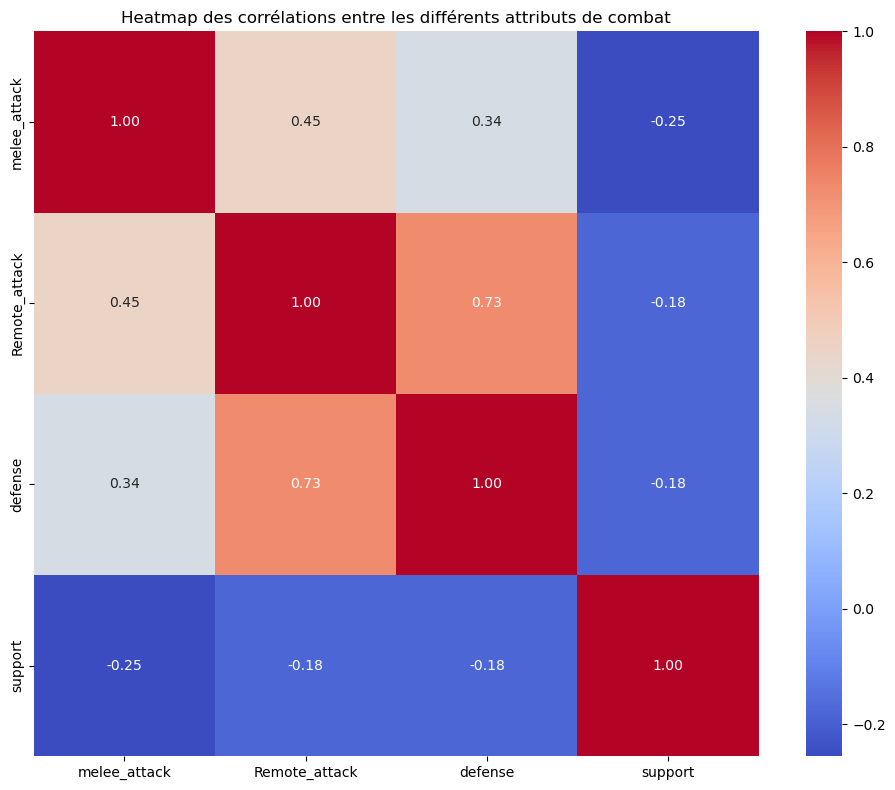

In [53]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
 select melee_attack, Remote_attack, defense,support from monsters;
"""

# === Lecture des données via pandas ===
df_pal_comb_attr = pd.read_sql(query, engine)

correlation_combat_attribut = df_pal_comb_attr.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_combat_attribut, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap des corrélations entre les différents attributs de combat")
plt.tight_layout()
plt.show()

engine.dispose()


### Analyse:
Nous pouvons voir dans ce graphique qu'il existe differentes correlations sur les attributs de combats:

Correlation modérée entre defense et melee_attack
Correlation modérée entre remote_attack et melee_attack
Correlation forte entre remote_attack et defense

### I. Comment la rareté d'un Pal affecte-t-elle les valeurs de ses attributs de base ?

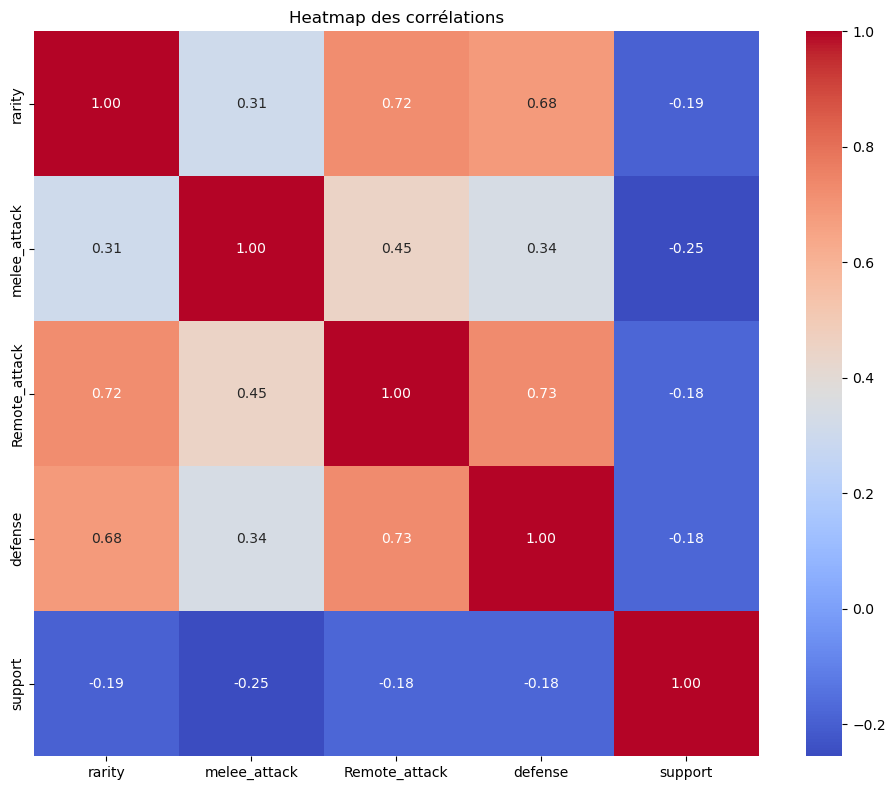

In [55]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
 select rarity, melee_attack, Remote_attack, defense,support from monsters;
"""

# === Lecture des données via pandas ===
df_pal_comb_attr = pd.read_sql(query, engine)

correlation_combat_attribut = df_pal_comb_attr.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_combat_attribut, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap des corrélations")
plt.tight_layout()
plt.show()

engine.dispose()

### Analyse:
La correlation de rareté du pals affecte:

De façon modéré la melee_attack
De façon forte la remote_attack et la défense du pals

### J Rareté moyenne des Pals ayant la puissance d'attaque la plus élevée 

### Objectif :

Identifier les Pals ayant les meilleures attaques (melee_attack, remote_attack)  

Calculer la rareté moyenne parmi ces Pals



In [57]:
# 1. Extraire attaque et rareté
query = """
SELECT OverrideNameTextID, melee_attack, remote_attack, rarity
FROM monsters
WHERE melee_attack IS NOT NULL AND remote_attack IS NOT NULL AND rarity IS NOT NULL;
"""
df = pd.read_sql(query, engine)

# 2. Créer une colonne de puissance offensive
df['attack_power'] = df['melee_attack'] + df['remote_attack']

# 3. Trier et garder le top 10 
top_attackers = df.sort_values(by='attack_power', ascending=False).head(10)

# 4. Calcul de la rareté moyenne
mean_rarity = top_attackers['rarity'].mean()

# 5. Affichage
print(" Rareté moyenne des 10 Pals avec la plus forte attaque :", round(mean_rarity, 2))
display(top_attackers[['OverrideNameTextID', 'melee_attack', 'remote_attack', 'rarity', 'attack_power']])


 Rareté moyenne des 10 Pals avec la plus forte attaque : 9.2


,OverrideNameTextID,melee_attack,remote_attack,rarity,attack_power
135,snowboss,130,200,10,330
91,umihebifire,150,130,9,280
124,kingbahamut,150,125,9,275
126,umihebi,150,120,8,270
115,anubis,130,130,10,260
47,baphometdark,150,105,5,255
45,blackgriffon,130,120,10,250
66,baphomet,150,100,4,250
123,blackcentaur,100,145,20,245
30,whitetiger,140,100,7,240


### Analyse:
L’analyse ci-dessus présente les 10 Pals affichant la plus forte puissance offensive, calculée comme la somme de melee_attack et remote_attack. Elle permet de répondre à une question stratégique importante :
Les Pals les plus puissants en attaque sont-ils aussi les plus rares ?
Résultats :
La rareté moyenne de ces 10 Pals est de 9.2, ce qui est significativement supérieur à la rareté médiane observée dans la population globale (~6.0).

Plusieurs Pals offensifs ont une rareté de 10 ou plus : snowboss, umihebi, anubis, etc.

Quelques exceptions existent :

baphometdark (rareté 5)

baphomet (rareté 4)

Interprétation stratégique :

Globalement, on observe une corrélation claire entre puissance offensive et rareté : les Pals les plus redoutables sont aussi les plus difficiles à obtenir.

Cependant, l’existence de Pals puissants à rareté modérée montre qu’il est possible d’optimiser une équipe sans forcément viser les Pals les plus rares.

Ces exceptions comme baphometdark offrent un excellent rapport attaque/rareté, intéressant pour les joueurs à ressources limitées.





### K. La taille des Pals affecte-t-elle leur performance au combat ?

size_encoded     1.000000
melee_attack     0.301194
Remote_attack    0.484397
defense          0.422419
support         -0.072035
Name: size_encoded, dtype: float64


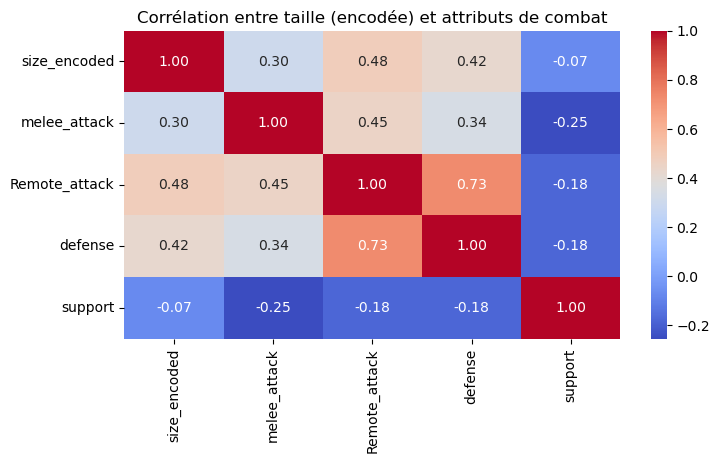

In [59]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query2 = """
 select size, melee_attack, Remote_attack, defense, support from monsters;
"""

# === Lecture des données via pandas ===
df_size_comb_attr = pd.read_sql(query2, engine)

size_order = {'XS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5}
df_size_comb_attr['size_encoded'] = df_size_comb_attr['size'].map(size_order)

correlations = df_size_comb_attr[['size_encoded', 'melee_attack', 'Remote_attack', 'defense', 'support']].corr()
print(correlations['size_encoded'])

plt.figure(figsize=(8, 4))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre taille (encodée) et attributs de combat")
plt.show()

### Analyse:
Il existe une corrélation modérée positive entre la taille des Pals et leur capacité de défense et attaque à distance. Cela signifie que les Pals de grande taille sont en moyenne plus résistants et mieux armés à distance.

La corrélation est plus faible pour l’attaque de mêlée et quasi inexistante pour les capacités de support, ce qui indique que ces rôles ne dépendent pas particulièrement de la taille.

L'attribut support montre même une légère corrélation négative, ce qui suggère que les Pals de plus petite taille peuvent exceller dans le soutien (collecte, soins,etc).

interpretation stratégique:
Oui, la taille influence la performance au combat, mais principalement pour des rôles défensifs ou de puissance à distance.

Toutefois, elle n’est pas déterminante pour les rôles de mêlée ou de support, ce qui confirme l’importance de la diversité morphologique dans la constitution d’une équipe de Pals.

## L   corrélation entre la vitesse et l’efficacité en combat.

Le graphique ci-dessus visualise la relation entre la vitesse moyenne des Pals calculée à partir des vitesses de marche, course et sprint et leur puissance de combat totale, qui regroupe les attributs :
melee_attack, remote_attack, defense, support.

 Corrélation entre vitesse moyenne et puissance de combat : 0.54


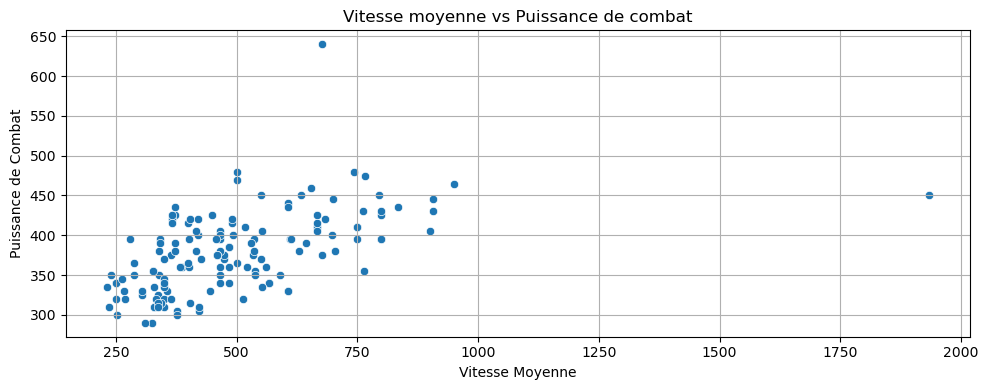

In [61]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)
query = """
SELECT OverrideNameTextID, walking_speed, running_speed, Riding_sprint_speed,
       melee_attack, remote_attack, defense, support
FROM monsters
WHERE walking_speed IS NOT NULL AND running_speed IS NOT NULL AND Riding_sprint_speed IS NOT NULL
  AND melee_attack IS NOT NULL AND remote_attack IS NOT NULL AND defense IS NOT NULL AND support IS NOT NULL;
"""
df = pd.read_sql(query, engine)

# Moyenne des vitesses
df['avg_speed'] = df[['walking_speed', 'running_speed', 'Riding_sprint_speed']].mean(axis=1)

# Puissance de combat totale
df['combat_power'] = df[['melee_attack', 'remote_attack', 'defense', 'support']].sum(axis=1)

# Corrélation
correlation = df['avg_speed'].corr(df['combat_power'])
print(f" Corrélation entre vitesse moyenne et puissance de combat : {correlation:.2f}")

# Visualisation
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='avg_speed', y='combat_power')
plt.title("Vitesse moyenne vs Puissance de combat")
plt.xlabel("Vitesse Moyenne")
plt.ylabel("Puissance de Combat")
plt.grid(True)
plt.tight_layout()
plt.show()




### Analyse:
La corrélation obtenue est de 0.54, ce qui indique une corrélation modérée à significative entre les deux variables.

On observe une tendance croissante sur le nuage de points : les Pals les plus rapides tendent à avoir une puissance de combat plus élevée.

Cependant, la dispersion reste notable, notamment chez les Pals très rapides mais au combat plus modeste.

conclusion:

Les Pals rapides sont généralement plus performants, mais la vitesse seule ne suffit pas à prédire la puissance.

La vitesse peut être vue comme un atout complémentaire, à combiner avec d'autres critères (attaque, endurance, taille, etc.) pour choisir un Pal de combat efficace.

### P. Nombre de Pals adaptés au travail de nuit

In [63]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
SELECT COUNT(*) AS nombre_pals_nuit 
FROM job_skills 
WHERE night_shift = 1;
"""

# === Exécution et affichage ===
result = pd.read_sql(query, engine)
nombre_pals = result.iloc[0]['nombre_pals_nuit']

print(f"Nombre de Pals adaptés au travail de nuit : {nombre_pals}")

# === Fermeture du engine ===
engine.dispose()

Nombre de Pals adaptés au travail de nuit : 25


### Q. Caractéristiques communes des Pals qui conviennent au travail de nuit

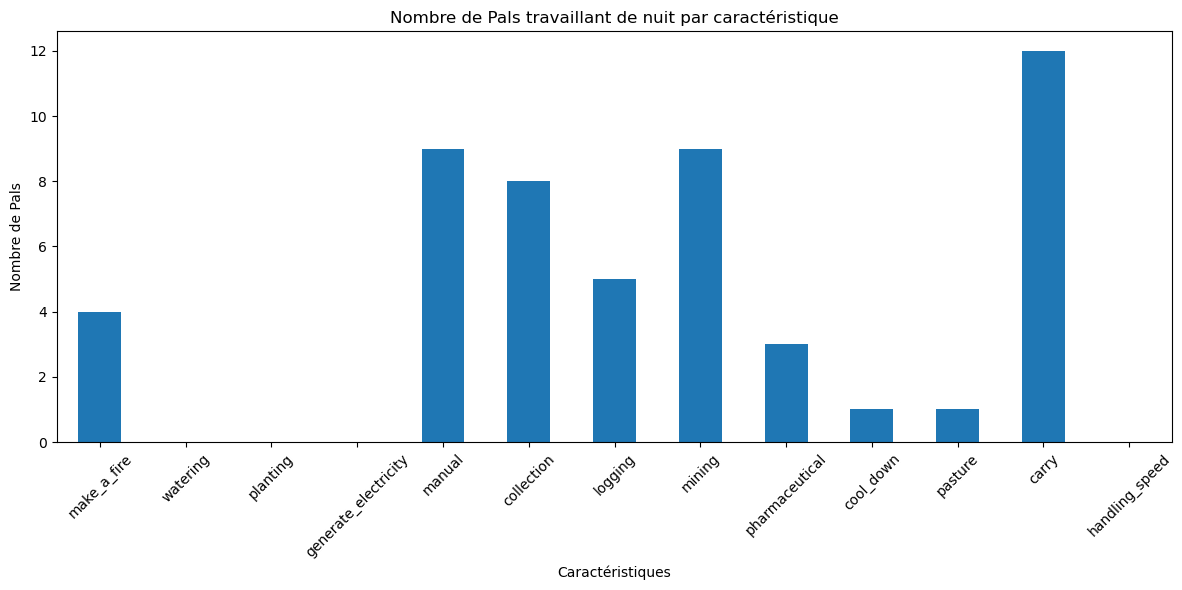

In [65]:
# Configuration de la base de données
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# Connexion à MariaDB via SQLAlchemy engine
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# Requête SQL pour sélectionner les caractéristiques des Pals adaptés au travail de nuit
query = """
SELECT make_a_fire, watering, planting,
       generate_electricity, manual, collection, logging, mining, pharmaceutical, cool_down,
       pasture, carry, handling_speed
FROM job_skills
WHERE night_shift = 1;
"""

# Lecture des données via pandas
df_night_shift = pd.read_sql(query, engine)

# Fermeture de la connexion
engine.dispose()

# Compter le nombre de Pals ayant chaque caractéristique
characteristics_count = df_night_shift.sum()

# Création du graphique en barres
plt.figure(figsize=(12, 6))
characteristics_count.plot(kind='bar')
plt.xlabel('Caractéristiques')
plt.ylabel('Nombre de Pals')
plt.title('Nombre de Pals travaillant de nuit par caractéristique')
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()


### Analyse:
Les résultats montrent que les Pals travaillant de nuit ont des compétences particulièrement élevées dans les domaines suivants :

- **Mining** : Cette caractéristique est cruciale pour l'extraction des ressources, ce qui suggère que les Pals travaillant de nuit sont efficaces pour les tâches d'extraction minière.
- **Manual** : Les compétences manuelles indiquent une capacité à effectuer des tâches physiques et de construction, ce qui est essentiel pour le développement et l'entretien des infrastructures.
- **Logging** : Cette compétence est importante pour la collecte de bois et d'autres ressources forestières, ce qui est vital pour la construction et le crafting.

Interprétation:

Les Pals travaillant de nuit semblent être optimisés pour des tâches qui nécessitent une forte capacité physique et une efficacité dans la collecte de ressources. Ces caractéristiques suggèrent que les Pals travaillant de nuit sont particulièrement utiles pour les opérations nécessitant une main-d'œuvre robuste et efficace dans des conditions de faible luminosité, ce qui peut être un avantage significatif pour les tâches nocturnes.


### R. Analyse des Pals par Compétences et Rareté

In [67]:
# Configuration de la base de données
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# Connexion à MariaDB via SQLAlchemy engine
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# Requête SQL pour sélectionner les Pals avec le plus de compétences
query = """
SELECT m.rarity
FROM monsters m
JOIN job_skills j ON m.id = j.id
ORDER BY j.total_skills DESC
LIMIT 10;
"""

# Lecture des données via pandas
df = pd.read_sql(query, engine)

# Fermeture de la connexion
engine.dispose()

# Calcul de la rareté moyenne des Pals sélectionnés
rarity_mean = df['rarity'].mean()

# Affichage du résultat
print(f"La rareté moyenne des Pals possédant le plus de compétences est : {rarity_mean}")



La rareté moyenne des Pals possédant le plus de compétences est : 5.5


## Méthodologie
- Jointure de Tables: Utilisation d'une jointure entre `monsters` et `job_skills` pour combiner les données sur les caractéristiques des Pals et leurs compétences.
- Tri et Sélection: Les Pals sont triés par nombre de compétences et rareté, puis les 10 premiers sont sélectionnés.

### S. Quels sont les Pals qui ont la vitesse de travail la plus élevée ?

In [69]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
SELECT OverrideNameTextID, CraftSpeed
FROM monsters
WHERE CraftSpeed IS NOT NULL
ORDER BY CraftSpeed DESC
LIMIT 144;
"""

# === Lecture des données via pandas ===
df = pd.read_sql(query, engine)

# === Affichage des résultats ===
print("=== Pals les moins feignants ===")
for index, row in df.iterrows():
    print(f"{index}: {row['OverrideNameTextID']} - Vitesse de travail: {row['CraftSpeed']}")

# === Fermeture du engine ===
engine.dispose()


=== Pals les moins feignants ===
0: sakurasauruswater - Vitesse de travail: 100
1: amaterasuwolf - Vitesse de travail: 100
2: robinhood - Vitesse de travail: 100
3: redarmorbird - Vitesse de travail: 100
4: colorfulbird - Vitesse de travail: 100
5: kelpiefire - Vitesse de travail: 100
6: pinkrabbit - Vitesse de travail: 100
7: sakurasaurus - Vitesse de travail: 100
8: alpaca - Vitesse de travail: 100
9: catvampire - Vitesse de travail: 100
10: chickenpal - Vitesse de travail: 100
11: sharkkid - Vitesse de travail: 100
12: kelpie - Vitesse de travail: 100
13: ronin - Vitesse de travail: 100
14: plantslime - Vitesse de travail: 100
15: plantslime - Vitesse de travail: 100
16: icefox - Vitesse de travail: 100
17: catbat - Vitesse de travail: 100
18: catmage - Vitesse de travail: 100
19: eleclion - Vitesse de travail: 100
20: carbunclo - Vitesse de travail: 100
21: robinhoodground - Vitesse de travail: 100
22: icedeer - Vitesse de travail: 100
23: fengyundeeper - Vitesse de travail: 100
24

Analyse de la Vitesse de Travail des Pals:

Tous les Pals ont la même vitesse de travail selon les données du CSV.

### T. Stratégie optimale de capture des Pals

In [71]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
SELECT OverrideNameTextID, CaptureProbability, Nocturnal FROM monsters                 
ORDER BY CaptureProbability DESC
LIMIT 20;
"""

# === Lecture des données via pandas ===
df = pd.read_sql(query, engine)

# === Affichage des résultats ===
print("=== Pals les plus faciles à capturer ===")
for index, row in df.iterrows():
    print(f"{index}: {row['OverrideNameTextID']} - Capture: {row['CaptureProbability']} - {nocturnal_status}")

# === Fermeture du engine ===
engine.dispose()


=== Pals les plus faciles à capturer ===


NameError: name 'nocturnal_status' is not defined

Connaître les Pals les plus faciles à capturer dans Palworld permet de cibler efficacement ceux-ci, optimisant ainsi les ressources, le temps et la progression dans le jeu. Cela aide à construire rapidement une équipe solide et à planifier stratégiquement les sessions de jeu. De plus, savoir s'ils sont nocturnes ou non permet d'adapter les périodes de chasse pour maximiser les chances de capture.

### U. Quel Tower Boss a le score d'attributs de combat combinés le plus élevé ?

In [77]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}
# Reconnexion à la base de données
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print("Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f"Erreur de connexion : {e}")
    exit(1)

    # === Requête SQL ===
query = """
SELECT id, name,
  (HP + melee_attack + remote_attack + defense) / 2 AS medium
FROM 
   tower_bosses
ORDER BY 
   medium DESC
LIMIT 1;
"""
try:
    cursor.execute(query)
    result = cursor.fetchone()
    if result:
        print('Le gagnant est : ')
    print(f"ID : {result[0]}, Nom : {result[1]}, Moyenne de combat: {result[2]}")
    conn.commit()
except mariadb.Error as e:
    print(f" Erreur création table : {e}")
    conn.close()
    exit(1)

Connexion réussie à MariaDB !
Le gagnant est : 
ID : 1, Nom : victor&heterogeneousgriffin, Moyenne de combat: 4275.0000


Sélection du Tower Boss le Plus Puissant

Choix des colonnes

Les colonnes utilisées dans la requête SQL sont les suivantes :
- `id` : identifiant unique du boss.
- `name` : nom du boss pour l'affichage.
- Une moyenne calculée à partir de `HP`, `melee_attack`, `remote_attack` et `defense`.

Ces quatre attributs sont essentiels dans un contexte de combat :
- **HP** évalue la capacité de survie.
- **melee_attack** et **remote_attack** couvrent l’ensemble des types d’agression possibles.
- **defense** mesure la résistance générale.

La combinaison de ces données permet une comparaison cohérente entre les entités, en mettant en valeur leur efficacité globale en combat.

L’approche garantit une sélection objective du boss le plus complet sur le plan statistique.


### V. Quelle est la répartition des niveaux d’apparition des Pals ?

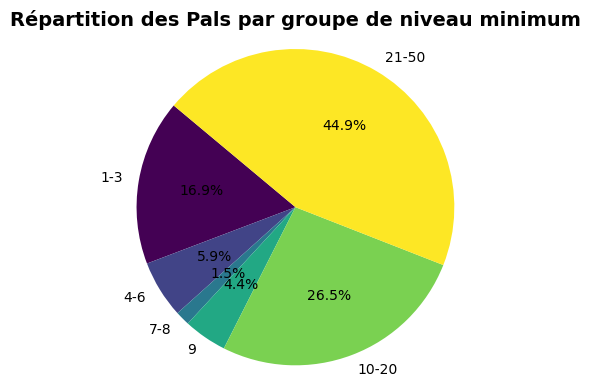

In [79]:
# === Connexion à MariaDB via SQLAlchemy ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# Création de l'engine SQLAlchemy
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
SELECT minimum_level
FROM palu_refresh_level
WHERE minimum_level IS NOT NULL;
"""

# === Lecture des données ===
df = pd.read_sql(query, engine)

# === Définition des tranches personnalisées ===
bins = [0, 3, 6, 8, 9, 20, 50]
labels = ['1-3', '4-6', '7-8', '9', '10-20', '21-50']

# Découpage des niveaux minimum en catégories
df['level_group'] = pd.cut(df['minimum_level'], bins=bins, labels=labels, right=True)

# Comptage des valeurs par groupe
group_counts = df['level_group'].value_counts().sort_index()

# === Affichage du camembert ===
plt.figure(figsize=(4, 4))
plt.pie(
    group_counts,
    labels=group_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.viridis(np.linspace(0, 1, len(group_counts)))
)
plt.title("Répartition des Pals par groupe de niveau minimum", fontsize=14, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# === Fermeture propre ===
engine.dispose()




Ce que notre analyse de répatition des niveaux min révèle :
Notre visualisation nous permet d'identifier les proportions exactes de Pals accessibles selon notre capacité réelle de capture en début de jeu.
L'insight de notre analyse :
En observant la répartition dans notre graphique en camembert, nous pouvons directement voir :

Quelle proportion de Pals est en capture quasi-garantie (niveau 1-3)
Quelle proportion reste viable avec de bonnes chances (niveau 4-6)
Quelle proportion demande plus d'efforts mais reste possible (niveau 7-8)
Quelle proportion est pratiquement hors de portée (niveau 9+)

L'utilité stratégique :
Notre code nous donne une cartographie précise de l'accessibilité du contenu Pals. Nous savons exactement quelle portion du roster nous est réellement disponible selon nos contraintes de capture en début de partie.
Cette visualisation transforme les mécaniques abstraites de capture en données concrètes sur la richesse du contenu accessible.

In [81]:
# Configuration base de données
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# Création du moteur SQLAlchemy
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# Requête SQL pour Pals avec minimum_level entre 1 et 3
query = """
SELECT name, minimum_level, maximum_level
FROM palu_refresh_level
WHERE minimum_level BETWEEN 1 AND 6;
AND ispal
"""

df = pd.read_sql(query, engine)

# Définition des tranches personnalisées pour maximum_level
bins = [0, 10, 14, 20, 25, 45]
labels = ['1-10', '11-14', '15-20', '21-25', '26-45']
df['max_level_group'] = pd.cut(df['maximum_level'], bins=bins, labels=labels, right=True)

# Comptage du nombre de Pals par groupe
group_counts = df['max_level_group'].value_counts().sort_index()

# Visualisation en barres verticales
plt.figure(figsize=(9,3))
bars = plt.bar(group_counts.index, group_counts.values, color='green', edgecolor='black')

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.title("Répartition des Pals (min_level 1-6) par tranche de max_level", fontsize=16)
plt.xlabel("Tranches de niveau maximum")
plt.ylabel("Nombre de Pals")
plt.ylim(0, max(group_counts.values)*1.15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

engine.dispose()


ProgrammingError: (mariadb.ProgrammingError) You have an error in your SQL syntax; check the manual that corresponds to your MariaDB server version for the right syntax to use near 'AND ispal' at line 4
[SQL: 
SELECT name, minimum_level, maximum_level
FROM palu_refresh_level
WHERE minimum_level BETWEEN 1 AND 6;
AND ispal
]
(Background on this error at: https://sqlalche.me/e/20/f405)

Stratégie de départ : sélection optimisée des Pals

Nous avons filtré les Pals avec un minimum_level entre 1 et 6 pour identifier ceux accessibles dès le début. En regroupant leur maximum_level par tranches (1–10, 10–14, 15–20, 20–25, 25–45), nous avons évalué leur potentiel d’évolution.

Les Pals de bas niveau avec un fort niveau max offrent un excellent retour sur investissement : ils restent utiles plus longtemps, optimisent la gestion des ressources et limitent les remplacements précoces.

Cette approche guide un choix stratégique dès les premières heures de jeu.

### W. Quelle est la répartition des zones d’apparition ?

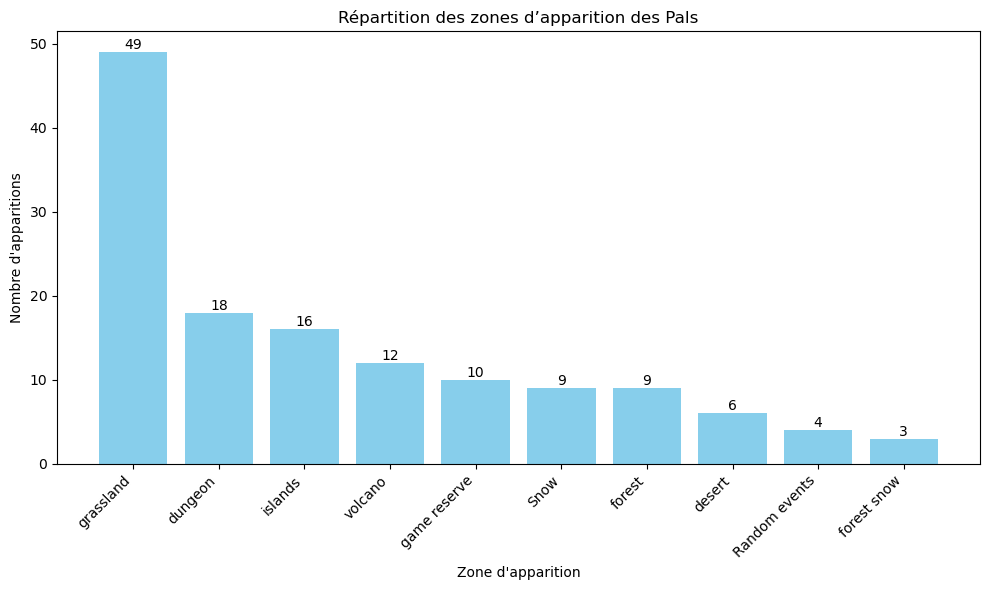

In [83]:

# === Config base de données ===
config = {
    'user': 'root',
    'password': 'root',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
SELECT refresh_area, COUNT(*) AS total
FROM palu_refresh_level
GROUP BY refresh_area
ORDER BY total DESC;
"""

# === Lecture des données via pandas ===
df = pd.read_sql(query, engine)

# === Affichage graphique ===
plt.figure(figsize=(10, 6))
bars = plt.bar(df['refresh_area'], df['total'], color='skyblue')
plt.xlabel("Zone d'apparition")
plt.ylabel("Nombre d'apparitions")
plt.title("Répartition des zones d’apparition des Pals")

# Ajoute le nombre sur chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# === Fermeture du engine ===
engine.dispose()


Ce que notre analyse révèle :
Notre visualisation identifie la densité de Pals par zone d'apparition.
L'utilité stratégique :
Nous savons exactement quelles zones prioriser pour maximiser nos rencontres de nouveaux Pals et quelles zones éviter car pauvres en diversité.
Notre analye transforme l'exploration aléatoire en stratégie d'exploration ciblée.

